In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
import classes.nb_general as NB_G 
import classes.visual_tools as VS
import scipy.linalg as la

In [4]:
def get_cut(k):
    assert k > 2
    G = nx.complete_graph(k)
    G.remove_edge(0,1)
    return nx.to_numpy_matrix(G), G

def run(G, a_=.95):
    A = nx.adjacency_matrix(G).todense()
    C, B = NB_G.to_edge_space(G,graph=False, B = True)
    S, T = NB_G.create_s_t(G)
    D_hat = np.diag(np.array(B.sum(axis=1)).reshape((B.shape[1],)))
    D = np.array(A.sum(axis=1)).reshape(A.shape[1],)

    # Get page rank of the edge space
    pr_e = np.array(list(nx.pagerank(nx.Graph(B,alpha=a_)).values()))
    
    # 'Spring Paper Eqn' 
    eqn = lambda alpha: la.solve(np.eye(B.shape[0])-alpha*B.T@la.solve(D_hat,np.eye(D_hat.shape[0])),(1-alpha)/A.shape[0]*T.T@(la.solve(T@T.T,np.eye(T.shape[0])))@np.ones(T.T.shape[1]))

    # Get page rank of the vertex space
    pr_v = np.array(list(nx.pagerank(nx.Graph(G,alpha=a_)).values()))
    pr_v_w = pr_v/D
    

    # Get projection of edge space to vertex space of appropriate page rank vectors
    pr_ = T@pr_e
    pr_w = pr_/D
    pr_2 = T@eqn(a_)
    pr_2_w = pr_2/D

    # Show Graphs
    plt.figure(figsize=(15,5))
    #plt.suptitle('Comparison of Graphs\n', fontsize=25)
    plt.subplot(121)
    plt.title("Normal Graph - $B$", fontsize=15)
    nx.draw(G,with_labels=True)
    plt.subplot(122)
    plt.title("Edge Space Graph - $\mathfrak{B}$", fontsize=15)
    nx.draw(nx.from_numpy_array(B), with_labels=True)
    plt.show()

    # Show Page Rank Values
    DOMAIN = np.arange(0, len(pr_v), 1)
    plt.figure(figsize=(15,5))
    plt.title("Page Rank Values", fontsize=25)
    plt.plot(DOMAIN, pr_v, 'o--', label='Original')
    plt.plot(DOMAIN, pr_,  'o--', label='Non-backtrack')
    #plt.plot(DOMAIN, pr_2,  'o--', label='Non-backtrack Springer')
    plt.legend(loc='best', fontsize=20)
    plt.xlabel("Vertex", fontsize=20)
    plt.ylabel("Node Value", fontsize=2)
    plt.show()
    
    return pr_v, pr_

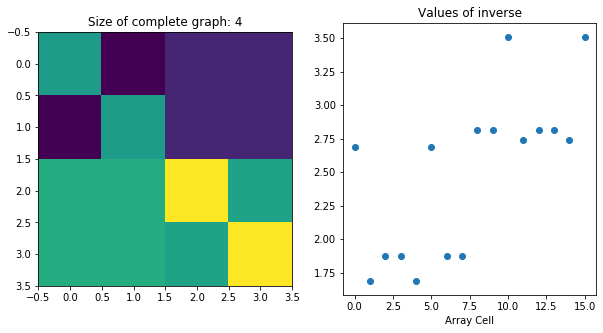

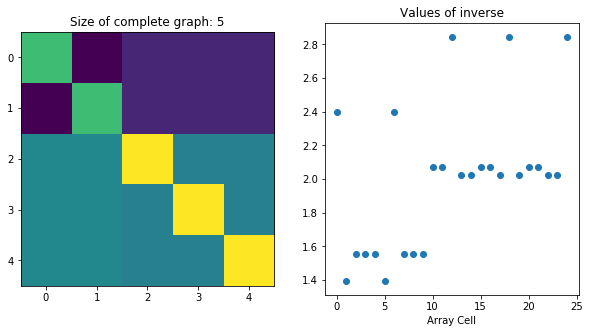

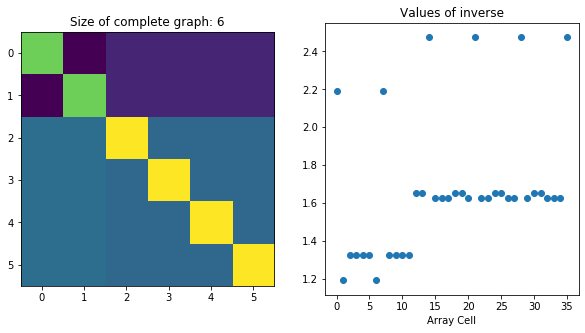

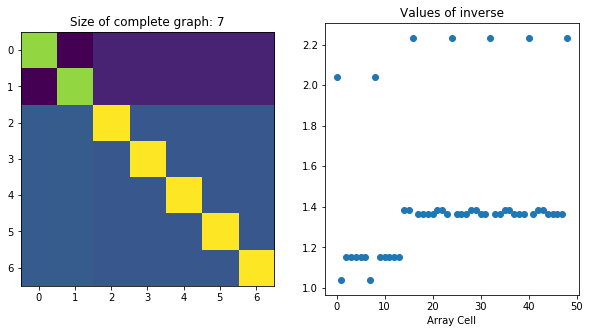

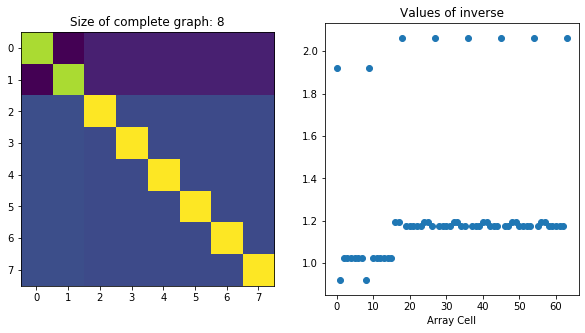

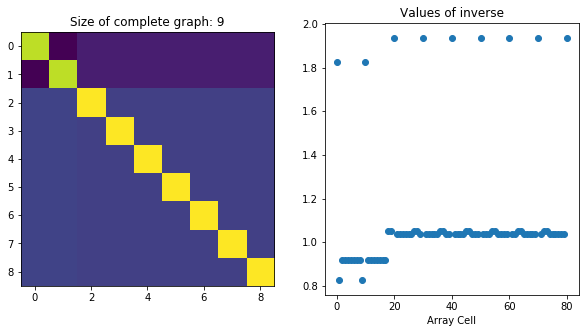

In [5]:
for k in range(4,10):
    eps = .9
    G, _ = get_cut(k)
    G /= np.sum(G,axis=0)
    
    J = np.eye(k)-eps*G
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.title("Size of complete graph: {}".format(k))
    plt.imshow(la.inv(J))
    plt.subplot(122)
    plt.title("Values of inverse")
    u = la.inv(J).flatten()
    plt.scatter(np.arange(0,len(u),1),u)
    plt.xlabel('Array Cell')
    plt.show()

In [6]:
from sympy import Symbol, Matrix, simplify

In [7]:
a = Symbol('a')
b = Symbol('b')
M =  Matrix([[1, 0, b, b, b, b],
             [0, 1, b, b, b, b],
             [a, a, 1, b, b, b],
             [a, a, b, 1, b, b],
             [a, a, b, b, 1, b],
             [a, a, b, b, b, 1]])

In [8]:
M =  Matrix([[1, 0, b, b, b],
             [0, 1, b, b, b],
             [a, a, 1, b, b],
             [a, a, b, 1, b],
             [a, a, b, b, 1]])

In [9]:
M =  Matrix([[1, -b, -b, -b, -b],
             [-b, 1, -b, -b, -b],
             [-b, -b, 1, -b, -b],
             [-b, -b, -b, 1, -b],
             [-b, -b, -b, -b, 1]])

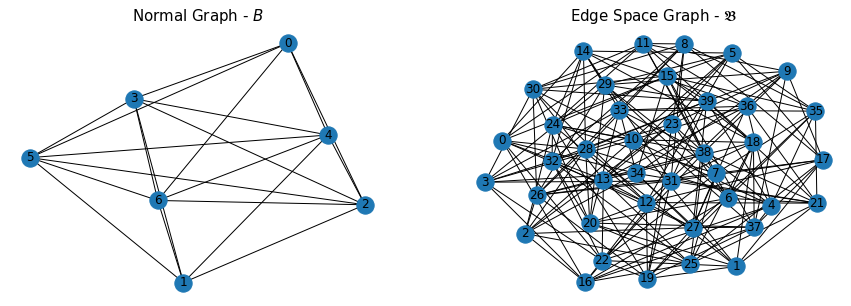

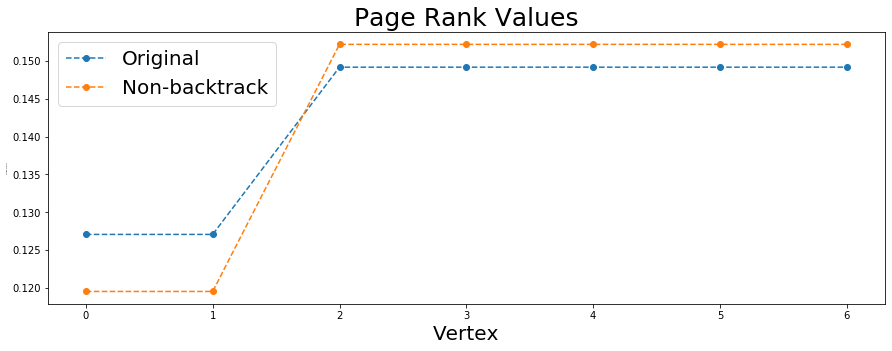

ValueError: operands could not be broadcast together with shapes (5,5) (7,7) 

In [7]:
eps = .9
G, G_ = get_cut(7)

run(G_)

G /= np.sum(G,axis=0)


Q = np.eye(5)-eps*G

In [35]:
print(la.inv(Q))
print(np.sum(la.inv(Q), axis=1))

[[2.39655172 1.39655172 1.55172414 1.55172414 1.55172414]
 [1.39655172 2.39655172 1.55172414 1.55172414 1.55172414]
 [2.06896552 2.06896552 2.84306826 2.02674173 2.02674173]
 [2.06896552 2.06896552 2.02674173 2.84306826 2.02674173]
 [2.06896552 2.06896552 2.02674173 2.02674173 2.84306826]]
[ 8.44827586  8.44827586 11.03448276 11.03448276 11.03448276]


In [10]:
M.inv()

Matrix([
[(((-a*b + 1)*((-2*a*b + 1)**2 - (-2*a*b + b)**2) - (-a*(-2*a*b + 1) + a*(-2*a*b + b))*(b*(-2*a*b + 1) - b*(-2*a*b + b)))*(-((-2*a*b + 1)*(-2*a*b + b) - (-2*a*b + b)**2)**2 + ((-2*a*b + 1)**2 - (-2*a*b + b)**2)**2) - (-(-a*(-2*a*b + 1) + a*(-2*a*b + b))*((-2*a*b + 1)*(-2*a*b + b) - (-2*a*b + b)**2) + (-a*(-2*a*b + 1) + a*(-2*a*b + b))*((-2*a*b + 1)**2 - (-2*a*b + b)**2))*(-(b*(-2*a*b + 1) - b*(-2*a*b + b))*((-2*a*b + 1)*(-2*a*b + b) - (-2*a*b + b)**2) + (b*(-2*a*b + 1) - b*(-2*a*b + b))*((-2*a*b + 1)**2 - (-2*a*b + b)**2)))/((-2*a*b + 1)*((-2*a*b + 1)**2 - (-2*a*b + b)**2)*(-((-2*a*b + 1)*(-2*a*b + b) - (-2*a*b + b)**2)**2 + ((-2*a*b + 1)**2 - (-2*a*b + b)**2)**2)),       (-(-(-a*(-2*a*b + 1) + a*(-2*a*b + b))*((-2*a*b + 1)*(-2*a*b + b) - (-2*a*b + b)**2) + (-a*(-2*a*b + 1) + a*(-2*a*b + b))*((-2*a*b + 1)**2 - (-2*a*b + b)**2))*(-(b*(-2*a*b + 1) - b*(-2*a*b + b))*((-2*a*b + 1)*(-2*a*b + b) - (-2*a*b + b)**2) + (b*(-2*a*b + 1) - b*(-2*a*b + b))*((-2*a*b + 1)**2 - (-2*a*b + b)**

In [20]:
M_4 =  Matrix([[1, 0, b, b],
               [0, 1, b, b],
               [a, a, 1, b],
               [a, a, b, 1]])

M_5 =  Matrix([[1, 0, b, b, b],
               [0, 1, b, b, b],
               [a, a, 1, b, b],
               [a, a, b, 1, b],
               [a, a, b, b, 1]])

M_6 =  Matrix([[1, 0, b, b, b, b],
               [0, 1, b, b, b, b],
               [a, a, 1, b, b, b],
               [a, a, b, 1, b, b],
               [a, a, b, b, 1, b],
               [a, a, b, b, b, 1]])

M_7 =  Matrix([[1, 0, b, b, b, b, b],
               [0, 1, b, b, b, b, b],
               [a, a, 1, b, b, b, b],
               [a, a, b, 1, b, b, b],
               [a, a, b, b, 1, b, b],
               [a, a, b, b, b, 1, b],
               [a, a, b, b, b, b, 1]])

simplify(M_7.inv())

Matrix([
[(5*a*b - 4*b - 1)/(10*a*b - 4*b - 1),            5*a*b/(-10*a*b + 4*b + 1),                                       b/(10*a*b - 4*b - 1),                                       b/(10*a*b - 4*b - 1),                                       b/(10*a*b - 4*b - 1),                                       b/(10*a*b - 4*b - 1),                                       b/(10*a*b - 4*b - 1)],
[           5*a*b/(-10*a*b + 4*b + 1), (5*a*b - 4*b - 1)/(10*a*b - 4*b - 1),                                       b/(10*a*b - 4*b - 1),                                       b/(10*a*b - 4*b - 1),                                       b/(10*a*b - 4*b - 1),                                       b/(10*a*b - 4*b - 1),                                       b/(10*a*b - 4*b - 1)],
[                a/(10*a*b - 4*b - 1),                 a/(10*a*b - 4*b - 1), (-8*a*b + 3*b + 1)/(10*a*b**2 - 10*a*b - 4*b**2 + 3*b + 1),        b*(2*a - 1)/(10*a*b**2 - 10*a*b - 4*b**2 + 3*b + 1),        b*(2*a - 1)/(10*a*b**2 - 10*a*b

In [15]:
M

Matrix([
[ 1, -b, -b, -b, -b],
[-b,  1, -b, -b, -b],
[-b, -b,  1, -b, -b],
[-b, -b, -b,  1, -b],
[-b, -b, -b, -b,  1]])

In [11]:
def verify_inverse():
    for k in range(4,50):
        eps = .9
        G, _ = get_cut(k)
        G /= np.sum(G,axis=0)

        J = np.eye(k)-eps*G

        # Build our inverse according to noted pattern
        alpha = -eps/(k-2)
        beta = -eps/(k-1)
        
        # Components of matrix inverse
        q1 = -(k-3)*beta**2+(k-4)*beta-(k-2)*alpha*beta*(1-beta)+1
        q2 = -(k-2)*alpha*beta**2+(k-2)*alpha*beta
        q3 = alpha*(beta-1)
        q4 = beta*(beta-1)
        q5 = -2*(k-3)*alpha*beta+(k-4)*beta+1
        q6 = 2*alpha*beta-beta
        
        # Building matrix
        A = np.array([[q1, q2],[q2,q1]])
        B = np.ones((2,k-2))*q4
        C = np.ones((k-2,2))*q3
        D = np.ones((k-2,k-2))*q6
        for i in range(k-2):
            D[i,i] = q5
            
        scale = (4+2*(k-4))*alpha*beta**2-(k-3)*beta**2-(4+2*(k-4))*alpha*beta+1+(k-4)*beta
        
        J_inv = np.hstack((np.vstack((A,C)),np.vstack((B,D))))
        
        res = (J@J_inv)*scale**-1
        
        print(np.allclose(res, np.eye(k)))

In [12]:
verify_inverse()

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
